In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Different \#threads comparison

<Axes: title={'center': 'w/ syn_50k_1M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

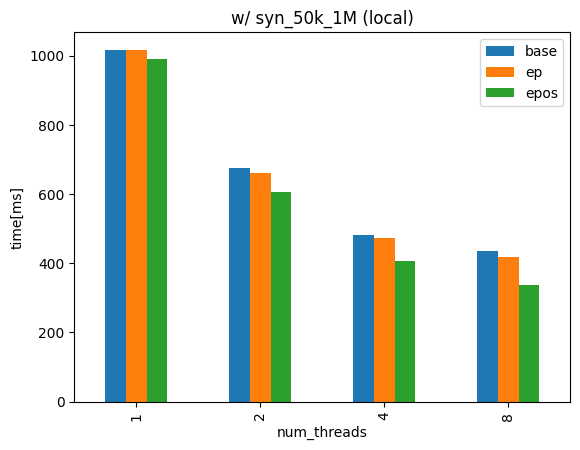

In [2]:
info = pd.read_csv("syn_50k_1M_diffThread.csv")

info\
    .drop(columns=["spark"])\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_50k_1M (local)")

<Axes: title={'center': 'w/ syn_1M_10M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

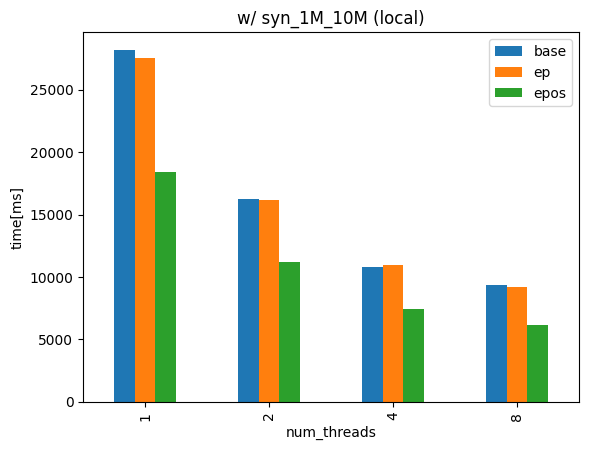

In [11]:
info = pd.read_csv("syn_1M_10M_diffThread.csv")

info\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_1M_10M (local)")

w/ syn_2M_10M

<Axes: title={'center': 'w/ syn_2M_10M (local)'}, xlabel='num_threads', ylabel='time[ms]'>

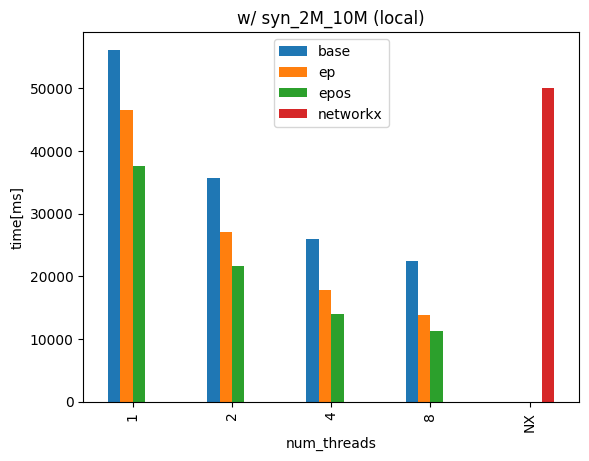

In [13]:
info = pd.read_csv("syn_2M_10M_diffThread.csv")

info\
    .plot(x="num_threads", ylabel="time[ms]", kind="bar", stacked=False, title="w/ syn_2M_10M (local)")

   num_threads      base         ep       epos
0            1  1.000000   1.000000   1.000000
1            2  1.344262   1.545805   1.516756
2            4  1.929730   3.037476   3.143257
3            8  2.144426   4.482095   4.363711
4           16  2.336005   6.043617   6.087516
5           32  2.524294   9.065425  11.767118
6           64  2.610357  10.300247  13.708181
7          128  2.607535   9.738524  10.090294


<Axes: title={'center': 'w/ human_brain (Titanic)'}, xlabel='num_threads', ylabel='speedup'>

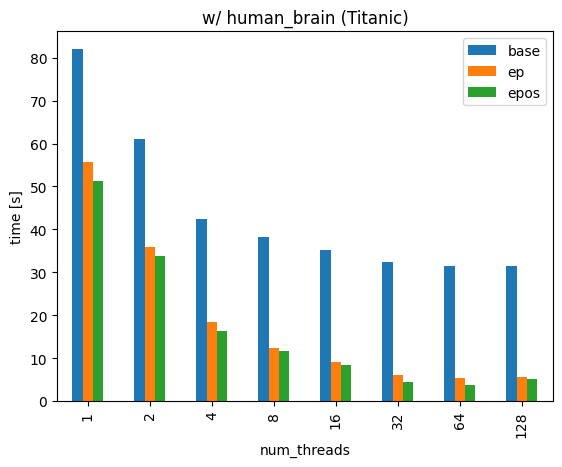

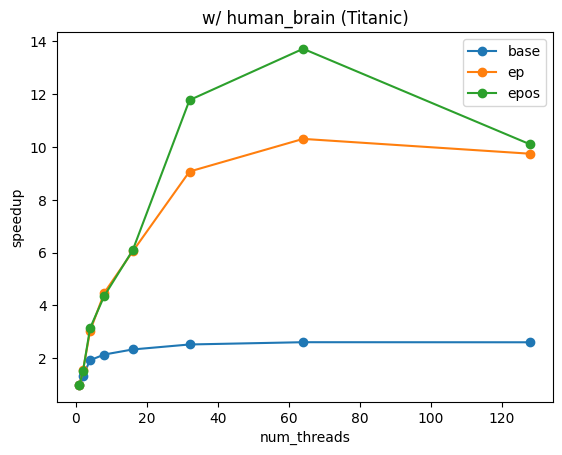

In [25]:
info = pd.read_csv("bn_titanic_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

info\
    .plot(x="num_threads", ylabel="time [s]", kind="bar", stacked=False, title="w/ human_brain (Titanic)")


cols = ["base", "ep", "epos"]
info[cols] = info.iloc[0][cols].div(info[cols])

print(info)

info\
    .plot(x="num_threads", ylabel="speedup", kind="line", marker='o', title="w/ human_brain (Titanic)")

   num_threads      base        ep      epos
0            1  1.000000  1.000000  1.000000
1            2  1.554408  1.626605  1.622579
2            4  2.204837  2.878523  2.419629
3            8  2.611136  3.075902  3.149255
4           16  2.902186  3.891092  3.899656
5           32  2.900726  4.243928  4.266739
6           64  2.918841  4.334937  4.256334
7          128  2.900366  4.209288  4.322606


<Axes: title={'center': 'w/ syn_5M_20M (Titanic)'}, xlabel='num_threads', ylabel='speedup'>

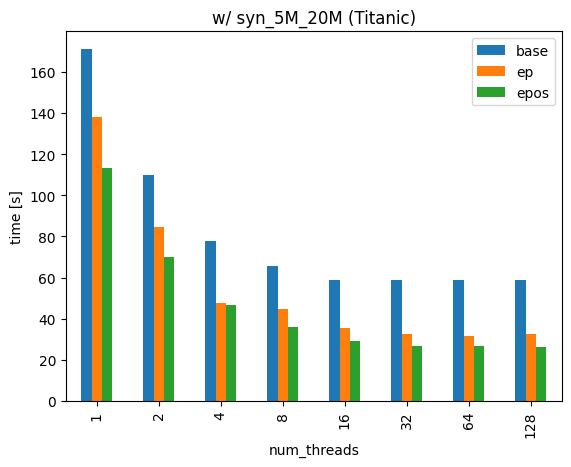

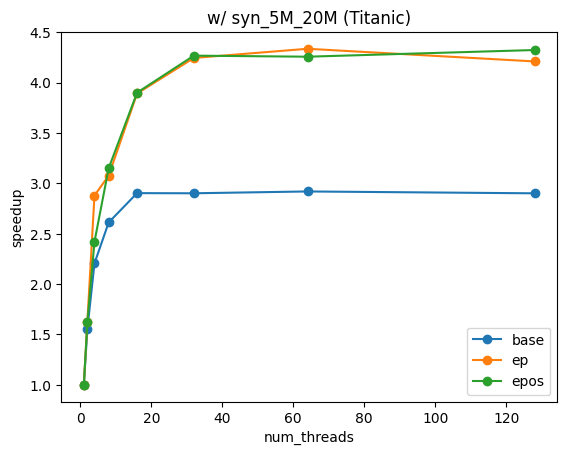

In [23]:
info = pd.read_csv("syn_5M_20M_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

info\
    .plot(x="num_threads", ylabel="time [s]", kind="bar", title="w/ syn_5M_20M (Titanic)")


cols = ["base", "ep", "epos"]
info[cols] = info.iloc[0][cols].div(info[cols])

print(info)

info\
    .plot(x="num_threads", ylabel="speedup", kind="line", marker='o', title="w/ syn_5M_20M (Titanic)")

# New style

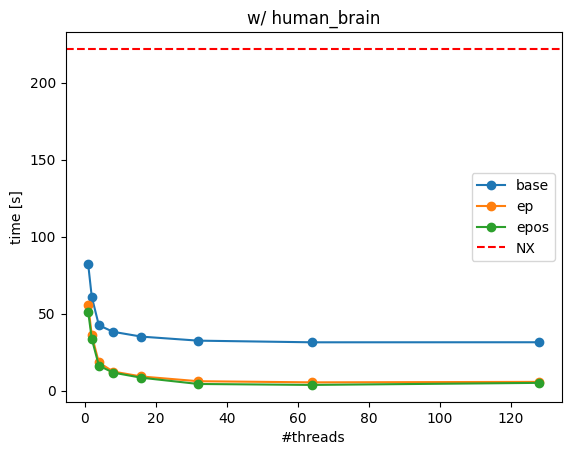

In [9]:
nx_time = 221935.6243 / 1000

info = pd.read_csv("bn_titanic_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

# Plotting the parallel algorithm's performance
plt.plot(info['num_threads'], info["base"], label="base", marker='o')
plt.plot(info['num_threads'], info["ep"], label="ep", marker='o')
plt.plot(info['num_threads'], info["epos"], label="epos", marker='o')


# Plotting the single-core algorithm (as a constant line)
plt.axhline(y=nx_time, color='r', linestyle='--', label="NX")

#plt.xscale('log')
#plt.xticks(info["num_threads"])

# Adding labels and title
plt.xlabel("#threads")
plt.ylabel("time [s]")
plt.title("w/ human_brain")
plt.legend()

# Show the plot
plt.show()


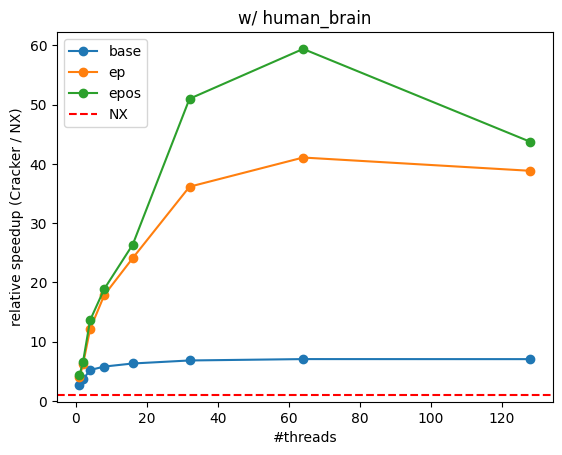

In [12]:
nx_time = 221935.6243 / 1000
cols = ["base", "ep", "epos"]

info = pd.read_csv("bn_titanic_diffThread.csv", comment='%')
info[cols] = nx_time / (info[cols] / 1000)



# Plotting the parallel algorithm's performance
plt.plot(info['num_threads'], info["base"], label="base", marker='o')
plt.plot(info['num_threads'], info["ep"], label="ep", marker='o')
plt.plot(info['num_threads'], info["epos"], label="epos", marker='o')


# Plotting the single-core algorithm (as a constant line)
plt.axhline(y=nx_time/nx_time, color='r', linestyle='--', label="NX")

#plt.xscale('log')
#plt.xticks(info["num_threads"])

# Adding labels and title
plt.xlabel("#threads")
plt.ylabel("relative speedup (Cracker / NX)")
plt.title("w/ human_brain")
plt.legend()

# Show the plot
plt.show()


   num_threads      base        ep      epos
0            1  1.000000  1.000000  1.000000
1            2  1.606358  1.565325  1.802969
2            4  2.534610  2.593926  2.920069
3            8  2.948852  3.413649  3.588821
4           16  3.649718  4.276569  4.318590
5           32  4.402085  5.748964  5.799028
6           64  4.664440  6.139000  5.975192
7          128  4.554529  5.854488  5.664434


<Axes: title={'center': 'w/ rgg_n2_23 (Titanic)'}, xlabel='num_threads', ylabel='speedup'>

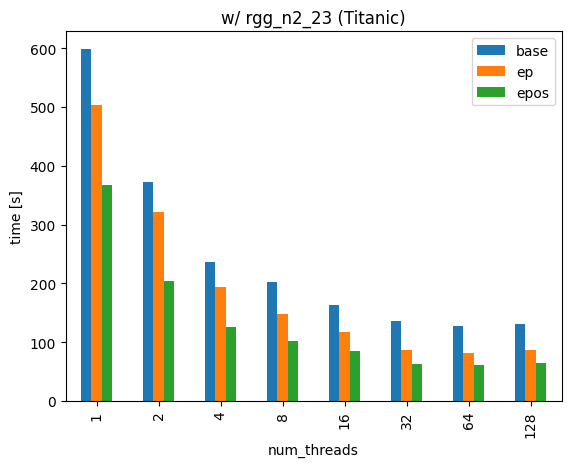

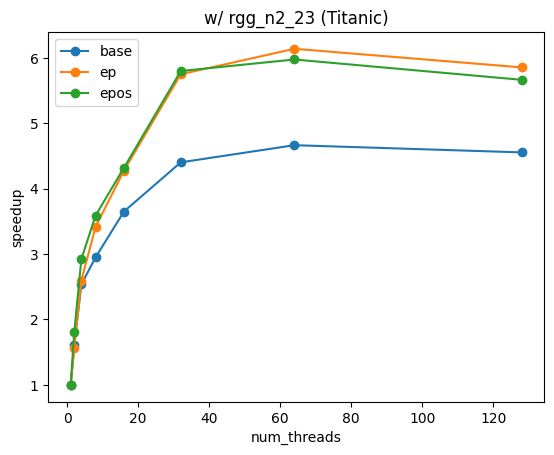

In [10]:
nx_time = 391327.26264 / 1000

info = pd.read_csv("rgg_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

info\
    .plot(x="num_threads", ylabel="time [s]", kind="bar", stacked=False, title="w/ rgg_n2_23 (Titanic)")

#plt.axhline(y=nx_time, color='r', linestyle='--', label="NX")

cols = ["base", "ep", "epos"]
info[cols] = info.iloc[0][cols].div(info[cols])

print(info)

info\
    .plot(x="num_threads", ylabel="speedup", kind="line", marker='o', title="w/ rgg_n2_23 (Titanic)")

# Degree sensitivity

   edges  avg_degree      base        ep      epos
0    1.0           2  1.000000  1.000000  1.000000
1    2.0           4  1.714397  1.964737  1.608107
2    5.0          10  2.537019  2.257848  2.692672
3   10.0          20  4.410627  3.854057  3.278075


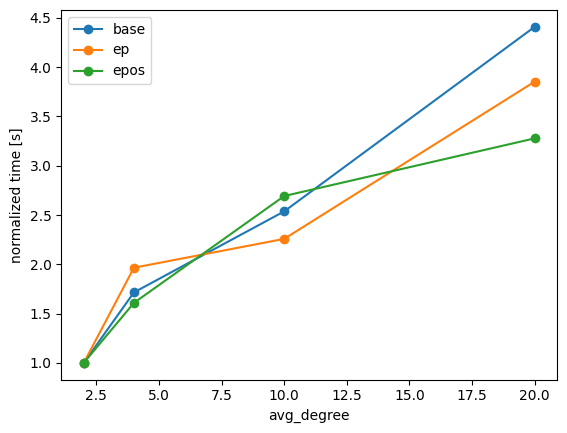

In [26]:

info = pd.read_csv("node_sensitivity.csv", comment='%')
info[["edges"]] = info[["edges"]] / 1_000_000
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

cols = ["base", "ep", "epos"]
#info[cols] = info.iloc[0][cols].div(info[cols])
info[cols] = info[cols] / info[cols].iloc[0]

#info\
#    .plot(x="avg_degree", y=["base", "ep", "epos"], ylabel="time [s]", kind="bar", stacked=False, title="")

info\
    .plot(x="avg_degree", y=["base", "ep", "epos"], ylabel="normalized time [s]", kind="line", marker='o', title="")

print(info)

vs NX

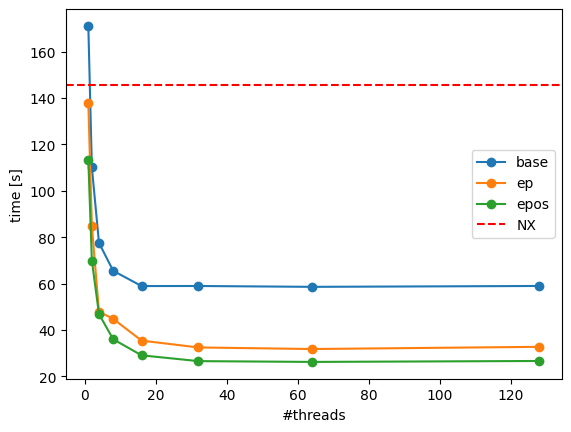

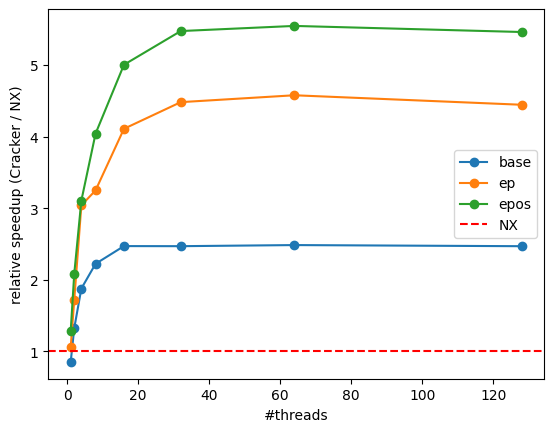

In [3]:
nx_time = 145566.59 / 1000


info = pd.read_csv("syn_5M_20M_diffThread.csv", comment='%')
info[["base", "ep", "epos"]] = info[["base", "ep", "epos"]] / 1000

# Plotting the parallel algorithm's performance
plt.plot(info['num_threads'], info["base"], label="base", marker='o')
plt.plot(info['num_threads'], info["ep"], label="ep", marker='o')
plt.plot(info['num_threads'], info["epos"], label="epos", marker='o')


# Plotting the single-core algorithm (as a constant line)
plt.axhline(y=nx_time, color='r', linestyle='--', label="NX")

#plt.xscale('log')
#plt.xticks(info["num_threads"])

# Adding labels and title
plt.xlabel("#threads")
plt.ylabel("time [s]")
#plt.title("w/ human_brain")
plt.legend()

# Show the plot
plt.show()


cols = ["base", "ep", "epos"]
info[cols] = nx_time / (info[cols])

# Plotting the parallel algorithm's performance
plt.plot(info['num_threads'], info["base"], label="base", marker='o')
plt.plot(info['num_threads'], info["ep"], label="ep", marker='o')
plt.plot(info['num_threads'], info["epos"], label="epos", marker='o')


# Plotting the single-core algorithm (as a constant line)
plt.axhline(y=nx_time/nx_time, color='r', linestyle='--', label="NX")

# Adding labels and title
plt.xlabel("#threads")
plt.ylabel("relative speedup (Cracker / NX)")
#plt.title("w/ human_brain")
plt.legend()

# Show the plot
plt.show()